<a href="https://colab.research.google.com/github/Renata-Romanelli/ML_stroke_prediction/blob/main/KNN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing Decision Tree Classifier algorithm to classify patient in Stroke of Healthy based on results of Cerebral Autoregulaiton methods

Cerebral Autoregulaiton results (features):
- Transfer Function analysis (Gain, Phase and Coherence)
- Autoregulaiton Index - ARI
- Autoregressive Moving Average ARI - ARMA-ARI
- Mean Flow Index - nMx

In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

In [ ]:
#Load dataset
df = pd.read_csv('control&stroke_TOTALacceptance1_new.csv', sep=';')
pd.set_option("display.max.columns", None)
df.head()

,Paciente,NIHSS_init,NIHSS_med,mRS,Hemisferio,tipo,stroke_type_NIHSSmed,type_num,type_num2,poor_functional,centro,GanhoVLF,GanhoLF,GanhoHF,FaseVLF,FaseLF,FaseHF,CohVLF,CohLF,CohHF,ARI,ARI_ARMA,nMx,ari_compromisedAC,acceptance
0,P01BA1A1,3,0,0,E,stroke,mild,1,0,0,Brasil,1.372,1.469,2.001,0.694,0.466,-0.327,0.959,0.882,0.579,4.169,4.91,0.6170,0,1
1,NaN,3,0,0,D,stroke,mild,1,0,0,Brasil,1.270,1.129,2.088,0.940,0.827,0.827,0.922,0.757,0.493,6.724,5.17,0.4903,0,1
2,P02BA1A1,9,12,5,E,stroke,moderate,1,1,1,Brasil,1.497,1.527,2.076,0.622,0.543,0.118,0.860,0.898,0.935,3.255,7.04,0.7160,1,1
3,NaN,9,12,5,D,stroke,moderate,1,1,1,Brasil,1.497,1.527,2.075,0.622,0.543,0.118,0.860,0.898,0.934,3.254,7.04,0.7160,1,1
4,P03A1BA1,10,8,1,E,stroke,moderate,1,1,0,Brasil,1.093,1.050,1.038,1.168,0.526,0.164,0.697,0.415,0.829,4.803,3.01,0.4889,1,1


In [ ]:
#Display dataset columns
df.columns

Index(['Paciente', 'NIHSS_init', 'NIHSS_med', 'mRS', 'Hemisferio', 'tipo',
       'stroke_type_NIHSSmed', 'type_num', 'type_num2', 'poor_functional',
       'centro', 'GanhoVLF', 'GanhoLF', 'GanhoHF', 'FaseVLF', 'FaseLF',
       'FaseHF', 'CohVLF', 'CohLF', 'CohHF', 'ARI', 'ARI_ARMA', 'nMx',
       'ari_compromisedAC', 'acceptance'],
      dtype='object')

In [ ]:
cols = {'type_num':'AIS', 'type_num2':'AIS_moderate_severe'}

df.rename(cols, inplace=True, axis=1)
df.drop(['Paciente', 'NIHSS_med'], inplace=True, axis=1)
df.shape

(145, 23)

Target column:  **AIS** categorizes the subsjects into 2 groups:
- 0 - Control
- 1 - AIS (Acute Ischemic Stroke)

In [ ]:
def removeoutlier(values):
  values = values.copy()
  fator = 1.5
  q3, q1 = np.percentile(values, [75, 25])
  iqr = q3 - q1
  lowpass = q1 - (iqr*fator)
  highpass = q3 + (iqr*fator)

  values[(values < lowpass) + (values > highpass)] = values.median()

  return values

In [ ]:
df.GanhoVLF = removeoutlier(df.GanhoVLF)
df.GanhoLF = removeoutlier(df.GanhoLF)
df.GanhoHF = removeoutlier(df.GanhoHF)
df.FaseVLF = removeoutlier(df.FaseVLF)
df.FaseLF = removeoutlier(df.FaseLF)
df.FaseHF = removeoutlier(df.FaseHF)
df.ARI = removeoutlier(df.ARI)
df.ARI_ARMA = removeoutlier(df.ARI_ARMA)
df.nMx = removeoutlier(df.nMx)

Text(0.5, 1.0, '')

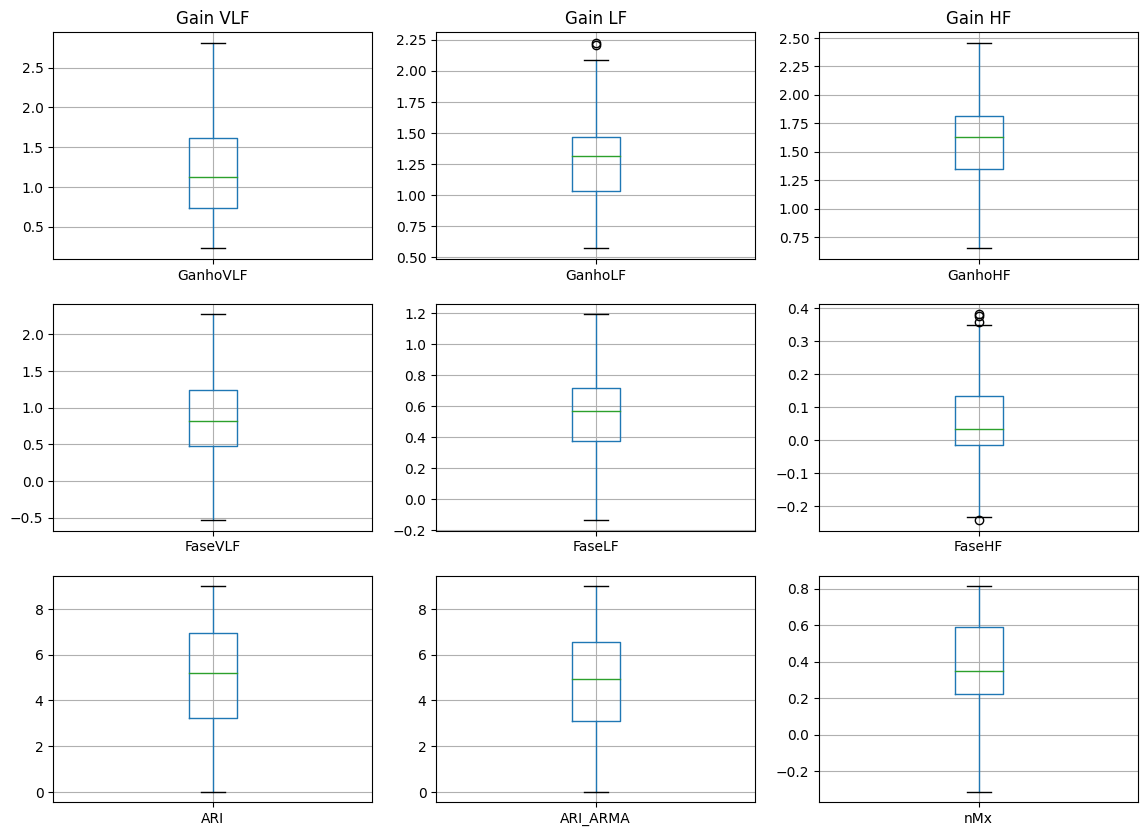

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(14,10))

plt.subplot(3, 3, 1)
fig = df.boxplot(column='GanhoVLF')
fig.set_title('Gain VLF')

plt.subplot(3, 3, 2)
fig = df.boxplot(column='GanhoLF')
fig.set_title('Gain LF')

plt.subplot(3, 3, 3)
fig = df.boxplot(column='GanhoHF')
fig.set_title('Gain HF')

plt.subplot(3, 3, 4)
fig = df.boxplot(column='FaseVLF')
fig.set_title('')

plt.subplot(3, 3, 5)
fig = df.boxplot(column='FaseLF')
fig.set_title('')

plt.subplot(3, 3, 6)
fig = df.boxplot(column='FaseHF')
fig.set_title('')

plt.subplot(3, 3, 7)
fig = df.boxplot(column='ARI')
fig.set_title('')

plt.subplot(3, 3, 8)
fig = df.boxplot(column='ARI_ARMA')
fig.set_title('')

plt.subplot(3, 3, 9)
fig = df.boxplot(column='nMx')
fig.set_title('')

## Functions with the evaluation metrics

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc

def ROC_curve(y_test, y_pred):

  fpr, tpr, threshold = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  # print('AUC: {}'.format(round(roc_auc,2)))

  plt.title('title')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right', fontsize=17)
  plt.plot([0, 1], [0, 1],'r--')
  plt.ylabel('True positive', fontsize=15)
  plt.xlabel('True negative', fontsize=15)
  plt.show()
  return roc_auc

In [ ]:
from sklearn.metrics import confusion_matrix

def ConfMat(y_test, y_pred):
  conf_matrix = confusion_matrix(y_test, y_pred)

  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap='viridis', alpha=0.8)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

  plt.xlabel('True Class', fontsize=18)
  plt.ylabel('Predicted Class', fontsize=18)
  plt.title('ARI and ARMA-ARI', fontsize=18)
  plt.show()

# K Nearest Neighbors (KNN)

In [ ]:
#Collect all independent data features into the X data-frame and target field into a y data-frame
data_Knn = df[['GanhoVLF', 'AIS']]
X = data_Knn.drop(['AIS'], axis = 1)
y = data_Knn['AIS']

In [ ]:
#Manipulate the data and normalize it
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [ ]:
# Importing cross-validation and KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

k = 4
neigh = KNeighborsClassifier(n_neighbors=k)

# Performing cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(neigh, X, y, cv=cv)

print("Accuracy of model at K=4 using cross-validation: {:.2f}".format(scores.mean()))

Accuracy of model at K=4 using cross-validation: 0.54


No código sugerido, cada fold é usado como conjunto de teste uma vez, enquanto o restante dos folds são combinados para formar o conjunto de treinamento. Nesse caso, como especificado em cv = KFold(n_splits=5, shuffle=True, random_state=42), estamos usando a validação cruzada com 5 folds. Isso significa que o conjunto de dados será dividido em 5 partes iguais (ou quase iguais, se o número de amostras não for divisível por 5).

Em cada iteração da validação cruzada, um dos folds será usado como conjunto de teste e os outros 4 folds serão combinados para formar o conjunto de treinamento. O modelo será treinado com o conjunto de treinamento e avaliado com o conjunto de teste. Esse processo será repetido 5 vezes, de forma que cada fold seja utilizado como conjunto de teste uma vez.

Assim, em cada fold, aproximadamente 80% dos dados serão usados para treinamento (4 folds) e aproximadamente 20% dos dados serão usados para teste (1 fold).

Caso deseje ajustar o número de folds, você pode modificar o parâmetro n_splits em KFold(n_splits=5, shuffle=True, random_state=42) para o valor desejado.

Maximum Accuracy: 0.683 at K = 12


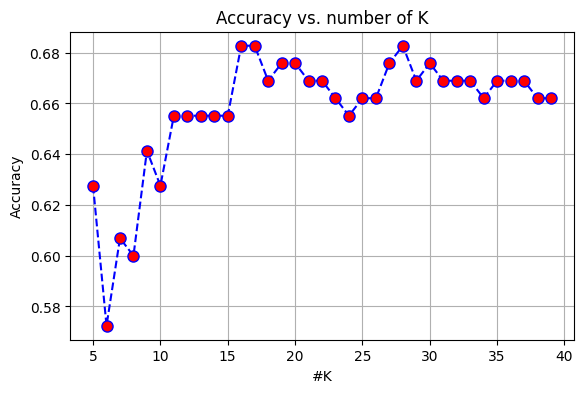

In [ ]:
from sklearn import metrics

# List to store the accuracies
acc = []

# K values to be tested
k_values = range(5, 40)

# Loop to test different K values
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(neigh, X, y, cv=5)  # Using cross-validation with 5 folds
    acc.append(scores.mean())

# Plotting the accuracy curve
plt.figure(figsize=(6.5, 4))
plt.plot(k_values, acc, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Accuracy vs. number of K')
plt.xlabel('#K')
plt.ylabel('Accuracy')
plt.grid()

# Finding the maximum accuracy and the corresponding K
max_acc = np.round(max(acc), 3)
optimal_k = acc.index(max(acc)) + 1
print("Maximum Accuracy:", max_acc, "at K =", optimal_k)

In [ ]:
# Define the classifier with the optimal K value
optimal_k = acc.index(max(acc)) + 1
neigh = KNeighborsClassifier(n_neighbors=optimal_k)
neigh.fit(X, y)

# Make predictions
y_pred = neigh.predict(X)

# Get scores
cv_scores = cross_val_score(neigh, X, y, cv=5)
scores = cross_val_score(neigh, X, y, cv=5)

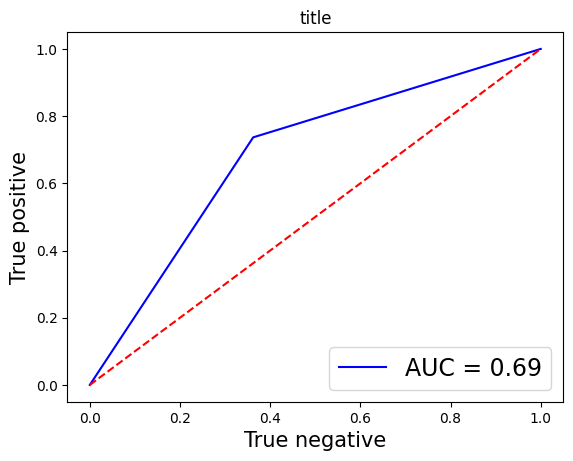

In [ ]:
roc_auc = ROC_curve(y, y_pred)

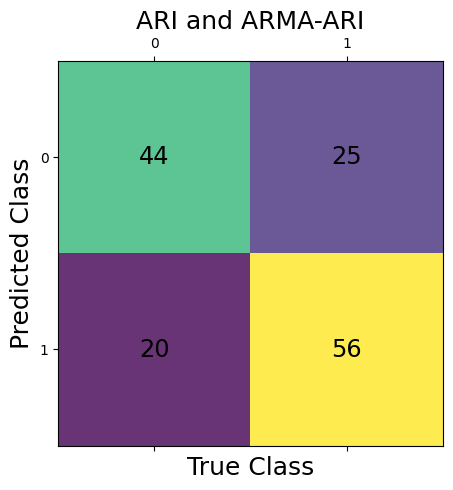

In [ ]:
ConfMat(y, y_pred)

Utilizando distancias ponderadas entre os vizinhos

Utilizando distancia de manhatan

In [ ]:
#Collect all independent data features into the X data-frame and target field into a y data-frame
data_Knn = df[['ARI','ARI_ARMA', 'type_num']]
X = data_Knn.drop(['type_num'], axis = 1)
y = data_Knn['type_num']

#Manipulate the data and normalize it
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#After splitting the data, we take 0.8% data for training and remaining for testing purposes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=4)
print('length of test samples: ',len(y_test))

length of test samples:  29


Acurácia Máxima: 0.759 at K = 15


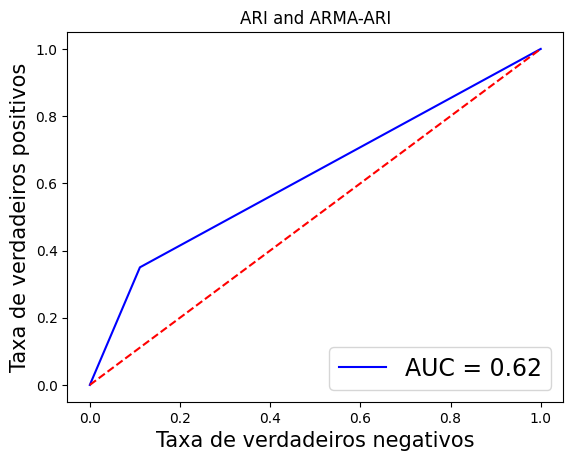

ROC curve: 0.619


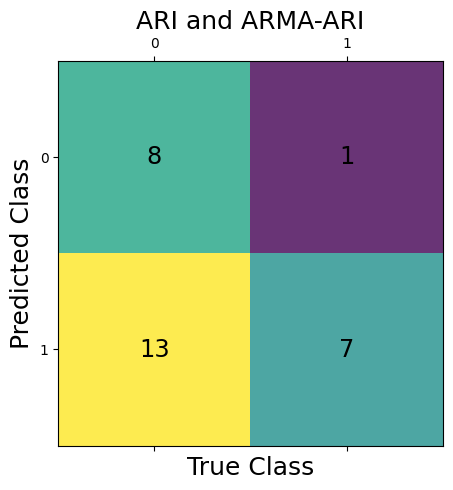

In [ ]:
acc = []

# Will take some time
from sklearn import metrics
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

print("Acurácia Máxima:",np.round(max(acc),3),"at K =",acc.index(max(acc))+1)
print("ROC curve:",np.round(ROC_curve(yhat),3))
ConfMat(y_test, yhat)

Acurácia Máxima: 0.621 at K = 11


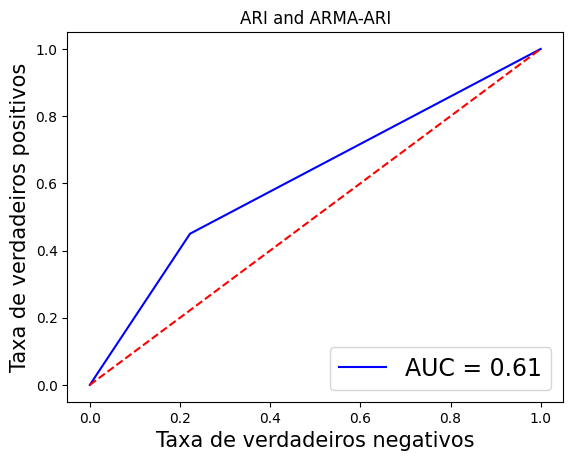

ROC curve: 0.614


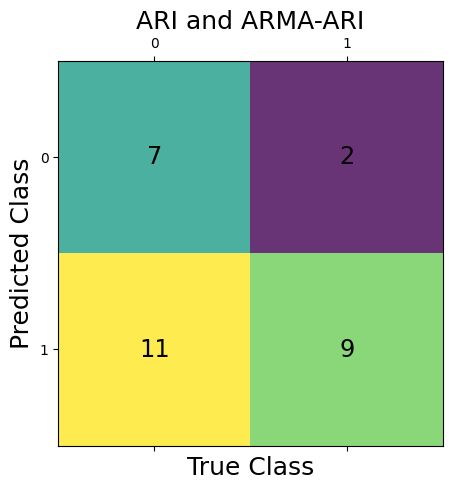

In [ ]:
acc = []

# Will take some time
from sklearn import metrics
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = i, metric='manhattan', weights='distance').fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

print("Acurácia Máxima:",np.round(max(acc),3),"at K =",acc.index(max(acc))+1)
print("ROC curve:",np.round(ROC_curve(yhat),3))
ConfMat(y_test, yhat)